<a href="https://colab.research.google.com/github/christian235711/Method_spad_test/blob/main/method_spad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option("display.max_row",130)
pd.set_option("display.max_columns",100)

In [ ]:
colonnes = ["IRIS","%C17_MENPSEUL","%C17_MENCOUPSENF","%C17_MENFAMMONO","%C17_PMEN_MENPSEUL","%P17_POP1524","%P17_POP2554","%P17_POP5579","%P17_POP80P","%P17_POP15P_PACSEE","%P17_POP15P_CONCUB_UNION_LIBRE","%P17_POP15P_VEUFS","%P17_POP15P_DIVORCEE","%P17_POP15P_CELIBATAIRE","%C17_MEN_CS1","%C17_MEN_CS2","%C17_MEN_CS3","%C17_MEN_CS4","%C17_MEN_CS5","%C17_MEN_CS6","%C17_MEN_CS7","%C17_MEN_CS8","%C17_NE24F0","%C17_NE24F4P","%P17_ACT1564","%P17_ACT1524","%P17_CHOM1564","%P17_CHOM1524","%P17_ETUD1564","%P17_AINACT1564","%P17_SAL15P","%P17_NSAL15P","%P17_SAL15P_CDI","%P17_SAL15P_EMPAID","%P17_NSAL15P_INDEP","%P17_ACTOCC15P_ILT1","%P17_ACTOCC15P_ILT2P","%C17_ACTOCC15P_VOIT","%C17_ACTOCC15P_TCOM","%P17_POP0205","%P17_SCOL0205","%P17_NSCOL15P_DIPLMIN","%P17_NSCOL15P_CAPBEP","%P17_NSCOL15P_BAC","%P17_NSCOL15P_SUP5","%P16_RP","%P16_RSECOCC","%P16_MAISON","%P16_APPART","%P16_RP_5P","%P16_RP_120P","%P16_RP_ACH19","%P16_RP_ACH45","%P16_RP_ACH70","%P16_RP_ACH90","%P16_RP_ACH05","%P16_RP_ACH13","%P16_PMEN_ANEM0002","%P16_PMEN_ANEM0204","%P16_PMEN_ANEM0509","%P16_PMEN_ANEM10P","%P16RP_PROP","%P16RP_LOC","%P16RP_LOCHLMV","%P16RP_CLIM","%P16RP_GARL","%P16RP_VOIT1","%P16RP_VOIT2P","%P16_POP_ETR","%P16_POP_IMM"]


In [ ]:
data_orig = pd.read_csv("/content/drive/MyDrive/Stage_methods_spad/input_texte.txt",delim_whitespace="\t" , header = None, names=colonnes, low_memory=False, )#, dtype='Int64')


In [ ]:
data = data_orig.copy()
data.shape

(48043, 70)

In [ ]:
data.head()

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,35,30,4,35,10,49,35,3,7,15,6,7,20,0,5,7,11,27,11,32,4,47,2,77,35,7,11,8,6,44,7,38,0,5,15,82,91,0,3,83,20,33,18,4,69,23,95,4,53,27,34,7,8,29,14,6,8,15,15,60,79,17,3,0,86,44,48,0,1
1,00000002011850000,46,27,5,46,12,36,38,12,3,9,10,8,28,1,4,3,12,18,12,37,8,57,2,72,46,5,7,9,8,39,5,33,0,3,72,31,75,1,3,70,21,27,17,4,77,9,47,49,29,15,14,10,25,31,10,6,15,22,15,45,45,52,19,0,71,52,26,5,8
2,00000003011870000,35,37,14,35,7,39,45,8,3,11,6,8,21,3,11,8,14,16,8,37,1,67,0,76,45,5,7,4,7,37,13,31,0,8,40,68,90,0,4,82,15,31,18,8,47,43,78,19,57,33,51,5,8,16,13,5,11,17,19,52,73,21,5,0,77,48,44,7,8
3,00000004011880000,17,23,12,17,10,52,29,6,4,10,5,3,16,4,2,6,23,17,23,19,4,42,0,81,60,10,20,5,4,45,10,42,0,6,15,75,89,3,6,71,27,28,16,3,92,3,99,0,59,39,35,6,1,21,14,20,8,11,24,55,90,9,0,0,83,35,61,0,1
4,00000005011890000,26,26,9,26,11,55,28,3,6,15,3,4,21,0,0,8,24,17,30,13,5,42,1,81,56,6,11,5,7,57,4,51,0,2,12,81,91,2,5,69,14,34,19,6,82,6,79,19,49,24,14,11,24,21,15,12,11,25,15,48,64,33,8,0,86,33,61,6,8


In [ ]:

data2 = data
#for i in range(data2.shape[0]):
#  data2.iloc[i,0]= str(i+1).zfill(8)
data2  

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,35,30,4,35,10,49,35,3,7,15,6,7,20,0,5,7,11,27,11,32,4,47,2,77,35,7,11,8,6,44,7,38,0,5,15,82,91,0,3,83,20,33,18,4,69,23,95,4,53,27,34,7,8,29,14,6,8,15,15,60,79,17,3,0,86,44,48,0,1
1,00000002011850000,46,27,5,46,12,36,38,12,3,9,10,8,28,1,4,3,12,18,12,37,8,57,2,72,46,5,7,9,8,39,5,33,0,3,72,31,75,1,3,70,21,27,17,4,77,9,47,49,29,15,14,10,25,31,10,6,15,22,15,45,45,52,19,0,71,52,26,5,8
2,00000003011870000,35,37,14,35,7,39,45,8,3,11,6,8,21,3,11,8,14,16,8,37,1,67,0,76,45,5,7,4,7,37,13,31,0,8,40,68,90,0,4,82,15,31,18,8,47,43,78,19,57,33,51,5,8,16,13,5,11,17,19,52,73,21,5,0,77,48,44,7,8
3,00000004011880000,17,23,12,17,10,52,29,6,4,10,5,3,16,4,2,6,23,17,23,19,4,42,0,81,60,10,20,5,4,45,10,42,0,6,15,75,89,3,6,71,27,28,16,3,92,3,99,0,59,39,35,6,1,21,14,20,8,11,24,55,90,9,0,0,83,35,61,0,1
4,00000005011890000,26,26,9,26,11,55,28,3,6,15,3,4,21,0,0,8,24,17,30,13,5,42,1,81,56,6,11,5,7,57,4,51,0,2,12,81,91,2,5,69,14,34,19,6,82,6,79,19,49,24,14,11,24,21,15,12,11,25,15,48,64,33,8,0,86,33,61,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,33,16,19,33,12,50,30,5,1,14,9,3,35,0,4,6,10,24,22,16,14,40,5,70,47,26,25,6,17,28,6,20,1,4,79,9,45,1,5,72,50,19,10,1,69,16,94,4,47,11,0,2,22,31,31,11,14,13,12,58,64,27,2,2,64,46,11,0,1
48039,00049221974240102,28,14,21,28,15,55,26,3,0,15,6,4,37,2,5,0,3,26,26,16,18,38,0,71,56,33,31,5,19,29,4,18,2,2,99,14,60,5,5,73,56,19,10,1,75,9,95,2,48,8,0,0,15,30,41,10,11,11,14,61,73,21,4,2,52,44,13,0,0
48040,00049222974240103,34,17,18,34,17,53,25,3,0,18,6,4,38,3,3,1,10,22,27,20,10,37,5,73,49,37,39,8,15,27,3,17,3,3,77,15,66,11,4,72,46,25,9,0,71,14,97,1,42,5,0,1,16,30,37,13,7,12,17,63,81,11,0,0,44,48,13,0,0
48041,00049223974240104,25,14,15,25,17,52,27,2,1,18,5,2,32,0,6,0,0,17,44,15,15,28,5,70,46,37,29,8,17,25,2,15,3,2,67,20,82,5,6,72,62,17,10,0,79,3,99,0,43,5,0,0,11,39,41,7,7,12,12,68,82,13,0,0,58,48,15,0,0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48043 entries, 0 to 48042
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   IRIS                            48043 non-null  object
 1   %C17_MENPSEUL                   48043 non-null  int64 
 2   %C17_MENCOUPSENF                48043 non-null  int64 
 3   %C17_MENFAMMONO                 48043 non-null  int64 
 4   %C17_PMEN_MENPSEUL              48043 non-null  int64 
 5   %P17_POP1524                    48043 non-null  int64 
 6   %P17_POP2554                    48043 non-null  int64 
 7   %P17_POP5579                    48043 non-null  int64 
 8   %P17_POP80P                     48043 non-null  int64 
 9   %P17_POP15P_PACSEE              48043 non-null  int64 
 10  %P17_POP15P_CONCUB_UNION_LIBRE  48043 non-null  int64 
 11  %P17_POP15P_VEUFS               48043 non-null  int64 
 12  %P17_POP15P_DIVORCEE            48043 non-null

In [ ]:
data2.describe()

,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
count,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000
mean,31.339633,29.048810,8.140249,31.339633,12.062278,45.318277,33.728722,6.921154,4.205254,11.652436,6.679225,5.328976,23.639427,2.762421,4.764274,8.477635,14.364361,14.911517,16.222821,31.009034,4.216743,50.988427,1.725121,74.460234,42.332827,8.764586,11.121641,8.454530,7.620632,41.346710,7.727390,34.993839,0.143330,4.454593,29.619632,71.426347,76.922882,8.460275,4.222904,74.185355,22.597111,26.839207,16.857565,7.297962,80.937452,9.724122,74.351831,23.877027,45.224632,21.555627,22.105489,9.175156,16.352913,25.414816,14.437920,9.637720,9.847678,16.453885,16.187665,55.558604,68.564099,27.950940,8.692296,0.396686,70.990717,43.195554,42.888891,5.307599,7.403722
std,11.230398,8.993539,5.784998,11.230398,5.261576,7.574313,7.889151,3.942014,2.633888,4.065741,3.164224,2.557826,8.334428,5.668966,4.638879,8.405171,7.441529,7.322677,9.384004,11.387354,5.730062,11.723375,3.024847,6.459557,13.157216,4.519130,7.844993,4.588326,5.125224,9.253958,4.603519,9.048420,0.460754,3.358961,20.909661,24.343659,19.412885,14.732810,1.779799,13.800656,8.947301,7.402738,3.640123,8.232063,14.394800,13.696239,32.006903,31.671598,18.992127,13.156693,18.458345,9.062675,14.083049,13.863468,9.671138,7.985752,5.667029,6.341756,4.581758,11.630671,20.923034,20.868008,16.732213,4.066052,18.701915,8.970391,17.143453,11.435280,11.746400
min,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,23.000000,5.000000,23.000000,9.000000,41.000000,29.000000,4.000000,2.000000,9.000000

In [ ]:
# visualisation des valeurs manquantes
#plt.figure(figsize=(20,10))
#sns.heatmap(data2.iloc[:,1:].isnull(), cbar=False)

In [ ]:
#vérification
data2.isnull().sum(axis=0)

IRIS                              0
%C17_MENPSEUL                     0
%C17_MENCOUPSENF                  0
%C17_MENFAMMONO                   0
%C17_PMEN_MENPSEUL                0
%P17_POP1524                      0
%P17_POP2554                      0
%P17_POP5579                      0
%P17_POP80P                       0
%P17_POP15P_PACSEE                0
%P17_POP15P_CONCUB_UNION_LIBRE    0
%P17_POP15P_VEUFS                 0
%P17_POP15P_DIVORCEE              0
%P17_POP15P_CELIBATAIRE           0
%C17_MEN_CS1                      0
%C17_MEN_CS2                      0
%C17_MEN_CS3                      0
%C17_MEN_CS4                      0
%C17_MEN_CS5                      0
%C17_MEN_CS6                      0
%C17_MEN_CS7                      0
%C17_MEN_CS8                      0
%C17_NE24F0                       0
%C17_NE24F4P                      0
%P17_ACT1564                      0
%P17_ACT1524                      0
%P17_CHOM1564                     0
%P17_CHOM1524               

In [ ]:
#création d'un dataframe vide dans lequel le nombre de modalités par variable sera enregistré
dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD"])
dff

,VARIABLE,NOMBRE_MOD


In [ ]:
#nombre de modalités de chaque variables
for i in range(data2.shape[1]): # 69
    taille =len(data2.iloc[:,i].value_counts(dropna=False))
    #print(str(colonnes[i] + " : "+str(taille)))
    print(str(colonnes[i] + "-"*(40-len(colonnes[i]))+str(taille)))
    dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille }, ignore_index=True)

IRIS------------------------------------48043
%C17_MENPSEUL---------------------------96
%C17_MENCOUPSENF------------------------78
%C17_MENFAMMONO-------------------------55
%C17_PMEN_MENPSEUL----------------------96
%P17_POP1524----------------------------79
%P17_POP2554----------------------------76
%P17_POP5579----------------------------72
%P17_POP80P-----------------------------42
%P17_POP15P_PACSEE----------------------28
%P17_POP15P_CONCUB_UNION_LIBRE----------52
%P17_POP15P_VEUFS-----------------------39
%P17_POP15P_DIVORCEE--------------------30
%P17_POP15P_CELIBATAIRE-----------------90
%C17_MEN_CS1----------------------------61
%C17_MEN_CS2----------------------------57
%C17_MEN_CS3----------------------------63
%C17_MEN_CS4----------------------------72
%C17_MEN_CS5----------------------------71
%C17_MEN_CS6----------------------------78
%C17_MEN_CS7----------------------------90
%C17_MEN_CS8----------------------------75
%C17_NE24F0-----------------------------92
%C17_NE2

In [ ]:
#visualisation du dataframe
dff.sort_values(by="NOMBRE_MOD")

,VARIABLE,NOMBRE_MOD
33,%P17_SAL15P_EMPAID,11
39,%P17_POP0205,24
9,%P17_POP15P_PACSEE,28
12,%P17_POP15P_DIVORCEE,30
11,%P17_POP15P_VEUFS,39
34,%P17_NSAL15P_INDEP,39
8,%P17_POP80P,42
23,%C17_NE24F4P,42
26,%P17_CHOM1564,46
31,%P17_NSAL15P,47


In [ ]:
# description des modalités d'une variable
data2.iloc[:,68].value_counts(dropna=False)

0       11582
1        8823
2        5896
3        4080
4        2847
5        2142
6        1644
7        1313
8        1120
9         920
10        772
11        726
12        644
13        551
14        435
15        400
16        384
17        301
18        281
19        258
20        240
21        213
22        193
23        176
26        150
25        142
27        132
24        131
28        126
30        110
31         97
29         95
33         84
35         82
34         68
32         63
36         62
37         54
39         52
38         52
40         39
41         35
44         31
47         31
42         28
48         26
45         26
46         26
43         25
53         22
49         20
50         19
51         17
60         14
63         13
52         12
57         12
56         11
54         11
59         11
58         10
65          9
62          8
70          8
61          7
79          7
67          6
76          5
68          5
75          5
77          5
81    

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# remplissage des valeurs manquantes
#data_sans_nan = data2.fillna(999)

In [ ]:
# visualisation des valeurs manquantes
#plt.figure(figsize=(20,10))
#sns.heatmap( data_sans_nan.iloc[:,1:].isnull(), cbar =False)

In [ ]:
data_sans_nan = data2

In [ ]:
# transformation des valeurs float en int
data_sans_nan.iloc[:,1:] = data_sans_nan.iloc[:,1:].astype(int)
data_sans_nan

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,35,30,4,35,10,49,35,3,7,15,6,7,20,0,5,7,11,27,11,32,4,47,2,77,35,7,11,8,6,44,7,38,0,5,15,82,91,0,3,83,20,33,18,4,69,23,95,4,53,27,34,7,8,29,14,6,8,15,15,60,79,17,3,0,86,44,48,0,1
1,00000002011850000,46,27,5,46,12,36,38,12,3,9,10,8,28,1,4,3,12,18,12,37,8,57,2,72,46,5,7,9,8,39,5,33,0,3,72,31,75,1,3,70,21,27,17,4,77,9,47,49,29,15,14,10,25,31,10,6,15,22,15,45,45,52,19,0,71,52,26,5,8
2,00000003011870000,35,37,14,35,7,39,45,8,3,11,6,8,21,3,11,8,14,16,8,37,1,67,0,76,45,5,7,4,7,37,13,31,0,8,40,68,90,0,4,82,15,31,18,8,47,43,78,19,57,33,51,5,8,16,13,5,11,17,19,52,73,21,5,0,77,48,44,7,8
3,00000004011880000,17,23,12,17,10,52,29,6,4,10,5,3,16,4,2,6,23,17,23,19,4,42,0,81,60,10,20,5,4,45,10,42,0,6,15,75,89,3,6,71,27,28,16,3,92,3,99,0,59,39,35,6,1,21,14,20,8,11,24,55,90,9,0,0,83,35,61,0,1
4,00000005011890000,26,26,9,26,11,55,28,3,6,15,3,4,21,0,0,8,24,17,30,13,5,42,1,81,56,6,11,5,7,57,4,51,0,2,12,81,91,2,5,69,14,34,19,6,82,6,79,19,49,24,14,11,24,21,15,12,11,25,15,48,64,33,8,0,86,33,61,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,33,16,19,33,12,50,30,5,1,14,9,3,35,0,4,6,10,24,22,16,14,40,5,70,47,26,25,6,17,28,6,20,1,4,79,9,45,1,5,72,50,19,10,1,69,16,94,4,47,11,0,2,22,31,31,11,14,13,12,58,64,27,2,2,64,46,11,0,1
48039,00049221974240102,28,14,21,28,15,55,26,3,0,15,6,4,37,2,5,0,3,26,26,16,18,38,0,71,56,33,31,5,19,29,4,18,2,2,99,14,60,5,5,73,56,19,10,1,75,9,95,2,48,8,0,0,15,30,41,10,11,11,14,61,73,21,4,2,52,44,13,0,0
48040,00049222974240103,34,17,18,34,17,53,25,3,0,18,6,4,38,3,3,1,10,22,27,20,10,37,5,73,49,37,39,8,15,27,3,17,3,3,77,15,66,11,4,72,46,25,9,0,71,14,97,1,42,5,0,1,16,30,37,13,7,12,17,63,81,11,0,0,44,48,13,0,0
48041,00049223974240104,25,14,15,25,17,52,27,2,1,18,5,2,32,0,6,0,0,17,44,15,15,28,5,70,46,37,29,8,17,25,2,15,3,2,67,20,82,5,6,72,62,17,10,0,79,3,99,0,43,5,0,0,11,39,41,7,7,12,12,68,82,13,0,0,58,48,15,0,0


In [ ]:
# discrétisation des variables continues (les valeurs manquantes doivent être gérées en amont)
method_discre = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile') 
method_discre.fit(data_sans_nan.iloc[:,1:])
resultat_discre = method_discre.transform(data_sans_nan.iloc[:,1:])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 13 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 20 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 22 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 32 are removed. Consider decreasing the number of bins.
  'decreasing the number of b

In [ ]:
# construction du data frame après discrétisation
data2_index = data2.iloc[:,0:1]
df_resultat_discre = pd.DataFrame(resultat_discre,columns=colonnes[1:] )
data_final = pd.concat([data2_index, df_resultat_discre], axis=1 )
data_final

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,2.0,2.0,0.0,2.0,1.0,2.0,2.0,0.0,3.0,3.0,2.0,3.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,2.0,3.0,0.0,1.0,3.0,1.0,3.0,2.0,1.0,0.0,3.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,3.0,2.0,2.0,0.0,1.0
1,00000002011850000,3.0,1.0,1.0,3.0,2.0,0.0,2.0,3.0,1.0,1.0,3.0,3.0,3.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,3.0,0.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,0.0,2.0,3.0
2,00000003011870000,2.0,3.0,3.0,2.0,0.0,0.0,3.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,2.0,2.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,3.0,3.0,1.0,3.0,0.0,2.0,3.0,0.0,2.0,2.0,3.0,0.0,3.0,1.0,2.0,2.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,3.0
3,00000004011880000,0.0,1.0,3.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,3.0,0.0,1.0,0.0,0.0,3.0,3.0,2.0,3.0,0.0,1.0,2.0,3.0,3.0,0.0,3.0,1.0,1.0,3.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,3.0,0.0,3.0,3.0,3.0,1.0,0.0,1.0,2.0,3.0,1.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0
4,00000005011890000,1.0,1.0,2.0,1.0,2.0,3.0,0.0,0.0,3.0,3.0,0.0,1.0,2.0,0.0,0.0,2.0,3.0,2.0,3.0,0.0,1.0,0.0,1.0,3.0,3.0,1.0,2.0,0.0,2.0,3.0,0.0,3.0,0.0,1.0,0.0,2.0,3.0,1.0,3.0,1.0,0.0,3.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,0.0,1.0,2.0,1.0,0.0,3.0,0.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,2.0,0.0,3.0,2.0,2.0,3.0,1.0,1.0,0.0,3.0,3.0,0.0,3.0,0.0,2.0,2.0,1.0,3.0,3.0,0.0,2.0,0.0,2.0,0.0,2.0,3.0,3.0,1.0,3.0,0.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0,3.0,2.0,3.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0
48039,00049221974240102,1.0,0.0,3.0,1.0,3.0,3.0,0.0,0.0,0.0,3.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,2.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
48040,00049222974240103,2.0,0.0,3.0,2.0,3.0,3.0,0.0,0.0,0.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,2.0,0.0,2.0,1.0,2.0,3.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
48041,00049223974240104,1.0,0.0,3.0,1.0,3.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,2.0,0.0,2.0,3.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,1.0,0.0,3.0,2.0,1.0,0.0,0

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48043 entries, 0 to 48042
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IRIS                            48043 non-null  object 
 1   %C17_MENPSEUL                   48043 non-null  float64
 2   %C17_MENCOUPSENF                48043 non-null  float64
 3   %C17_MENFAMMONO                 48043 non-null  float64
 4   %C17_PMEN_MENPSEUL              48043 non-null  float64
 5   %P17_POP1524                    48043 non-null  float64
 6   %P17_POP2554                    48043 non-null  float64
 7   %P17_POP5579                    48043 non-null  float64
 8   %P17_POP80P                     48043 non-null  float64
 9   %P17_POP15P_PACSEE              48043 non-null  float64
 10  %P17_POP15P_CONCUB_UNION_LIBRE  48043 non-null  float64
 11  %P17_POP15P_VEUFS               48043 non-null  float64
 12  %P17_POP15P_DIVORCEE            

In [ ]:
#!pip install mca

In [ ]:
#import mca

In [ ]:
#mca_df=mca(data_final,benzecri=False)


TypeError: ignored

In [ ]:
#!pip install prince

In [ ]:
import prince

In [ ]:
mca = prince.MCA()

In [ ]:

mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
churn_mca = mca.fit(data_final.iloc[0:1000,1:10])
#mca = mca.transform(data_final) # same as calling ca.fs_r_sup(df_new) for *another* test set.
#print(mca)


ZeroDivisionError: ignored

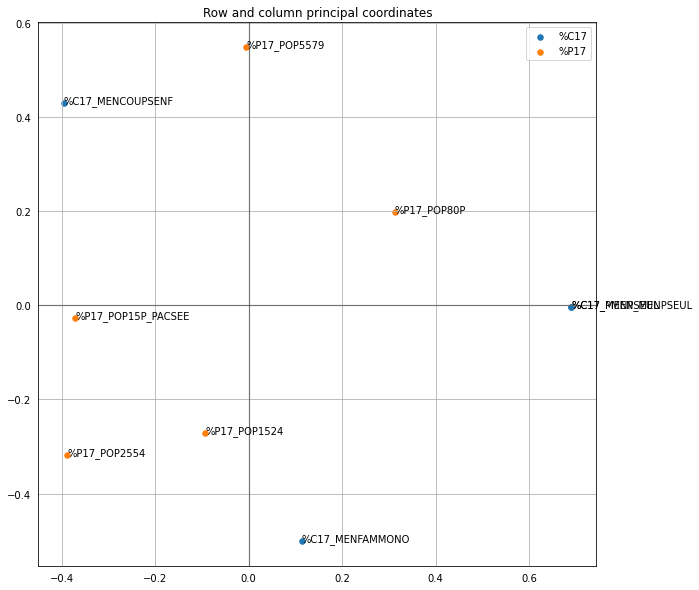

In [ ]:
ax = churn_mca.plot_coordinates(X=data_final.iloc[0:1000,1:10],ax=None,figsize=(10, 10),show_row_points=False,row_points_size=0,show_row_labels=False,show_column_points=True,column_points_size=30, show_column_labels=True,legend_n_cols=1).legend(loc='center left', bbox_to_anchor=(1, 0.5))